In [1]:
import pandas as pd

In [2]:
bioassay = pd.read_csv('../AID_1706_datatable_all.csv.gz',compression='gzip',skiprows=range(1,5))

In [20]:
# Get what is usefull, and rename to match VS naming scheme
df = bioassay[['PUBCHEM_SID','PUBCHEM_ACTIVITY_OUTCOME','Inhibition']]
df.columns=['id','kind','Inhibition']

In [21]:
# Read qvina docking scores, and fix wrong HEADER
qvina = pd.read_csv('DockFlow_qvina.csv.gz',compression='gzip')
qvina.columns=['id','pose','qvina']

# Read Rescores.
vina    = pd.read_csv('rescore_vina.csv.gz',compression='gzip')
smina   = pd.read_csv('rescore_smina.csv.gz',compression='gzip')
vinardo = pd.read_csv('rescore_vinardo.csv.gz',compression='gzip')

# Read RF-ScoreVS_v2 rescore
rfscore_vs_v2 = pd.read_csv('rfscore.csv.gz',compression='gzip')
rfscore_vs_v2.columns=['pose','id','RFScoreVS_v2']

/Users/dgomes/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
# Concatenate all into "data"
data = pd.merge(df,rfscore_vs_v2,on='id')
data = pd.merge(data,qvina,  on=['id','pose'])
data = pd.merge(data,vina,   on=['id','pose'])
data = pd.merge(data,smina,  on=['id','pose'])
data = pd.merge(data,vinardo,on=['id','pose'])

0.405324893841299
0.40275380824596235
0.4013926159432578
0.4056176823651859
0.5314814168237849


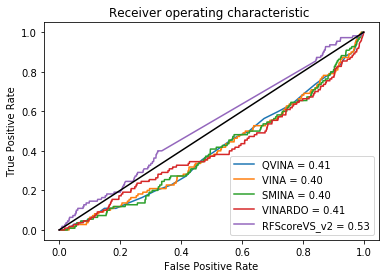

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1st top pose according to Qvina
df = data.sort_values('qvina').groupby('id').head(1)
fpr, tpr, _ = roc_curve(np.array(df['kind']),np.array(df['qvina']),pos_label='Active')
roc_auc = auc(fpr, tpr)
sns.lineplot(fpr,tpr,label=f'QVINA = {roc_auc:.2f}')
print(roc_auc)

# 1st top pose according to Vina
df = data.sort_values('vina').groupby('id').head(1)
fpr, tpr, _ = roc_curve(np.array(df['kind']),np.array(df['vina']),pos_label='Active')
roc_auc = auc(fpr, tpr)
sns.lineplot(fpr,tpr,label=f'VINA = {roc_auc:.2f}')
print(roc_auc)

# 1st top pose according to Smina
df = data.sort_values('smina').groupby('id').head(1)
fpr, tpr, _ = roc_curve(np.array(df['kind']),np.array(df['smina']),pos_label='Active')
roc_auc = auc(fpr, tpr)
sns.lineplot(fpr,tpr,label=f'SMINA = {roc_auc:.2f}')
print(roc_auc)

# 1st top pose according to Vinardo
df = data.sort_values('vinardo').groupby('id').head(1)
fpr, tpr, _ = roc_curve(np.array(df['kind']),np.array(df['vinardo']),pos_label='Active')
roc_auc = auc(fpr, tpr)
sns.lineplot(fpr,tpr,label=f'VINARDO = {roc_auc:.2f}')
print(roc_auc)

# 1st top pose according to RFScoreVS_v2 ( Virtual screening optimized )
df = data.sort_values('RFScoreVS_v2').groupby('id').head(1)
fpr, tpr, _ = roc_curve(np.array(df['kind']),np.array(df['RFScoreVS_v2']),pos_label='Active')
roc_auc = auc(fpr, tpr)
sns.lineplot(fpr,tpr,label=f'RFScoreVS_v2 = {roc_auc:.2f}')
print(roc_auc)

# Plot a line
sns.lineplot([0, 1], [0, 1],color='black',linestyle='dotted')

# Some legends
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

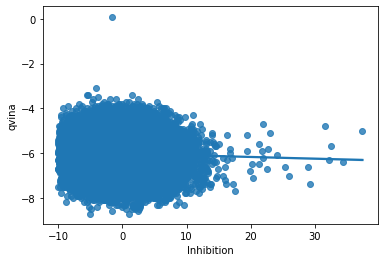

In [39]:
# Só de curiosidade, como está a correlação com a inibição (não espere ser boa... tá um lixo.)

# 1st top pose according to Qvina
df = data.sort_values('qvina').groupby('id').head(1)
sns.regplot(data=df.query('-10 < Inhibition < 40'),x='Inhibition',y='qvina',label=f'QVINA')